# Data Processing

In this exercise we are going to look at some data.

The datasets are available from the [ACT Open Data Portal](https://www.data.act.gov.au/)

We are looking at data for [pedestrian crashes](https://www.data.act.gov.au/Justice-Safety-and-Emergency/Pedestrian-Crashes/emq2-8bc4/data) in the ACT.

You can download the data for exploration using Excel or Sheets.

This exercise will introduce you to data analysis using python.
***
## Jupyter Notebooks and Colab:

The notebook state is "remembered" during a session.

Any variables created in one cell will retain their value when referenced in another cell.

If "inactive" for a time - Google Colab will "reset" the engine.

You will lose all variable values when this happens.  This requires re-executing each cell in sequence to return the engine to its previous state.

***
## Importing Libraries
The first thing we have to do in working with data is to import code libraries which will make the job of data analysis easier.

We will be working with the libraries:


*   [NumPy](https://numpy.org/) - Python Numerical Analysis
*   [Pandas](https://pandas.pydata.org/) - Python Data Analysis
*   [MatPlotLib](https://matplotlib.org/) - Python Data Plotting

Import "as" allows you to rename a module for ease of access: it gives a "nickname" for the module. 

For example (not a code cell!):
```python
import pandas as pd # You can now refer to pandas using the name "pd"
```



In [0]:
# import gives us access to a library of python code
# In this way we can build our code based on sophisticated code
# created by a wide range of experts from around the world.

import numpy as np
# numpy is a library for numerical analysis

import pandas as pd
# pandas is a library for data processing

import matplotlib.pyplot as plt
# matplotlib is a library for plotting quantitative data

import datetime
# datetime enables us to handle date and time data numerically

import matplotlib.pyplot as plt

# Connect to our Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Remember to execute each code cell!

# Read in your data
Let's read in the crash data spreadsheet using pandas "read_csv"

parse_dates is a parameter which enable translation of a date string into standard date format.

In this example we are reading in the Pedestrian Crash Data from the ACT Open Data Portal.  It has been downloaded from the portal, and then uploaded to my Google Drive folder "My Drive/Colab Notebooks/Data".

> ***read_csv*** reads a comma separated value file, and gives a pandas dataframe as a result. The CSV file must have data structured in rows and columns.

> What is a ___pandas dataframe___? A *"two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns."*  ([GeeksForGeeks](https://www.geeksforgeeks.org/python-pandas-dataframe/)).  It is like a Spreadsheet Table or SQL Database Table.


In [0]:
#read in the ACT Pedestrian Crash Data
act_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Pedestrian_Crashes.csv',parse_dates={"crash_date": ['Crash Date']})

# We now have a variable called act_data which references a Pandas DataFrame


### Date Datatype
#### string vs pandas timestamp

The Crash Date (the date the pedestrian crash occurred) was parsed during import

> define parse:  the process of analyzing a string of symbols, either in natural language, computer languages or data structures, conforming to the rules of a formal grammar. ([Wikipedia](https://en.wikipedia.org/wiki/Parsing))

NOTE: This parse_date was possible because we looked at the CSV **FIRST** and knew the names of the columns and the format of the dates in the "Crash Date" column.

We can checkout this column like so:

In [0]:
act_data.crash_date

0     2017-01-23
1     2016-05-09
2     2019-06-08
3     2012-03-05
4     2012-09-25
         ...    
474   2017-08-22
475   2019-04-28
476   2018-12-28
477   2019-04-15
478   2015-07-08
Name: crash_date, Length: 479, dtype: datetime64[ns]

If your crash_date is a String (because you did not use parse_dates), and not a datetime64, then you need to convert it so that we can access full datetime functionality.

You can convert this using pandas to_datetime() function.

In [0]:
# This shows how to convert a string date formatted as dd/mm/yyyy into a 
# act_data['crash_date'] = pd.to_datetime(act_data['crash_date_str'],format='%d/%m/%Y')
# YOU DO NOT NEED TO RUN THIS!  WE PARSED THE DATES!

# Investigating the DataFrame

We can display the first few rows using the head() function

In [0]:
#display the first 5 entries

act_data.head()

,crash_date,Crash ID,Crash Time,Severity,Crash Type,Pedestrians,Pedestrian Casualties,Reported Location,Location
0,2017-01-23,1152106,16:00,Injury,Struck pedestrian (On Road),1,1,RATCLIFFE CRESCENT (CHALLINOR -> CHALLINOR),"(-35.23191, 149.054575)"
1,2016-05-09,1152674,10:29,Injury,Struck pedestrian (Off Road),1,1,BORROWDALE STREET (NORFOLK -> BORROWDALE),"(-35.342443, 149.12875)"
2,2019-06-08,1214139,12:16,Property Damage Only,Struck pedestrian (Off Road),1,0,FLEMINGTON/NULLARBOR INTERSECTION,"(-35.201011, 149.149205)"
3,2012-03-05,1057306,16:40,Fatal,Struck pedestrian (On Road),2,2,BATESON/YAMBA INTERSECTION,"(-35.347313, 149.099872)"
4,2012-09-25,1046532,10:16,Injury,Struck pedestrian (On Road),1,1,BRISBANE AVENUE (JOHN MCEWEN -> STATE),"(-35.308829, 149.130814)"


There is also a tail function for a dataframe.

Challenge: Write code to call the tail function on the act_data dataframe.

In [0]:
# Write your code here to call the tail function on the act_data dataframe
# And run it!


## Describing the data
Pandas dataframes have a describe function.

This will give you some basic statistical details for each numeric column in the dataframe.

What is this telling us about the dataframe?

In [0]:
act_data.describe()

,Pedestrians,Casualties
count,479.000000,479.000000
mean,1.025052,0.665971
std,0.156447,0.502203
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,2.000000,2.000000


# Dataframe indexes
Dataframes have an index. If you do not specify an index, an index is created for you. This contains a sequential number for each row of the dataframe.

Lets have a look at the index

In [0]:
act_data.index

RangeIndex(start=0, stop=479, step=1)

This is the default index.

We can use another colun as an index. Why would we want to do this?  And what are the restrictions?

Indexes are required for using filters (to select part of your data - see below).

If you define a column as an index, then you can refer to the column using the name "index".

## Date-based Index
With a date column as an index, you can access date properties directly on the index. This is useful for filtering, grouping, sorting, etc.

If you do not do this - then you must refer to the column by name.

In [0]:
#   If you want to set the crash_date as an index, uncomment the line of code
#   below, and run this cell.
act_data.set_index('crash_date', inplace=True)

# DataFrame column manipluations

With your dataframe, you can change the columns:


1.   Change the name of a column
2.   Convert the datatype of a column (string to date, for example)
3.   Drop (Delete) a column you are not using
4.   Add a new column - based on calculated data


To change column names:

In [0]:
#Tidy up the column names
act_data = act_data.rename(columns={
    "Crash Time": "Crash_Time",
    "Crash Type": "Crash_Type",
    "Pedestrian Casualties": "Casualties",
    "Reported Location": "Location"})

# Note - we assign the result of the operation back to the original dataframe
act_data.head()

,crash_date,Crash ID,Crash_Time,Severity,Crash_Type,Pedestrians,Casualties,Location,Location
0,2017-01-23,1152106,16:00,Injury,Struck pedestrian (On Road),1,1,RATCLIFFE CRESCENT (CHALLINOR -> CHALLINOR),"(-35.23191, 149.054575)"
1,2016-05-09,1152674,10:29,Injury,Struck pedestrian (Off Road),1,1,BORROWDALE STREET (NORFOLK -> BORROWDALE),"(-35.342443, 149.12875)"
2,2019-06-08,1214139,12:16,Property Damage Only,Struck pedestrian (Off Road),1,0,FLEMINGTON/NULLARBOR INTERSECTION,"(-35.201011, 149.149205)"
3,2012-03-05,1057306,16:40,Fatal,Struck pedestrian (On Road),2,2,BATESON/YAMBA INTERSECTION,"(-35.347313, 149.099872)"
4,2012-09-25,1046532,10:16,Injury,Struck pedestrian (On Road),1,1,BRISBANE AVENUE (JOHN MCEWEN -> STATE),"(-35.308829, 149.130814)"


In [0]:
# Note - we assign the result of the operation back to the original dataframe
act_data.head()

,Crash_Time,Severity,Crash_Type,Pedestrians,Casualties,Location,Location
crash_date,,,,,,,
2017-01-23,16:00,Injury,Struck pedestrian (On Road),1,1,RATCLIFFE CRESCENT (CHALLINOR -> CHALLINOR),"(-35.23191, 149.054575)"
2016-05-09,10:29,Injury,Struck pedestrian (Off Road),1,1,BORROWDALE STREET (NORFOLK -> BORROWDALE),"(-35.342443, 149.12875)"
2019-06-08,12:16,Property Damage Only,Struck pedestrian (Off Road),1,0,FLEMINGTON/NULLARBOR INTERSECTION,"(-35.201011, 149.149205)"
2012-03-05,16:40,Fatal,Struck pedestrian (On Road),2,2,BATESON/YAMBA INTERSECTION,"(-35.347313, 149.099872)"
2012-09-25,10:16,Injury,Struck pedestrian (On Road),1,1,BRISBANE AVENUE (JOHN MCEWEN -> STATE),"(-35.308829, 149.130814)"


To drop a column:

In [0]:
# Crash ID comes from the ACT Open Data Portal
# It has been treated as a numeric value (and thus shows up in "act_data.describe()" above)
# BUT it doesn't represent a numeric value
# So we can drop it from the dataframe

act_data = act_data.drop(columns=['Crash ID'])

# Note - we assign the result of the operation back to the original dataframe

To add a computed value column:

In [0]:
# Create a column for the day of week of the crash
act_data['day_name'] = act_data.index.day_name()

# Create a 'crash_year' column from the crash_date

# Version 1: get the year from the "dt" (datetime) value of the crash_date
act_data["crash_year"] = act_data.index.year
# Version 2: Lambda function
# act_data["crash_year"] = act_data.crash_date.map(lambda x: x.strftime('%Y'))
# Show the contents of the new column
act_data.crash_year

crash_date
2017-01-23    2017
2016-05-09    2016
2019-06-08    2019
2012-03-05    2012
2012-09-25    2012
              ... 
2017-08-22    2017
2019-04-28    2019
2018-12-28    2018
2019-04-15    2019
2015-07-08    2015
Name: crash_year, Length: 479, dtype: int64

# Plotting Data

Pandas uses **MatPlotLib** to plot data.
You can also use MatPlotLib directly.

The plot() function takes parameters similar to MatPlotLib

You can call plot on any "plottable" value (quantifiable data).

For example - lets plot the whole dataframe

In [0]:
act_data.plot()
# This does not work - as the datetime values confuse pandas
#   - how should they be interpreted?
#   - what axes do we wish to use
#   - pandas best guess fails

ValueError: ignored

<Figure size 432x288 with 1 Axes>

### OK - that didn't work

Let try to plot just Pedestrians on the y-axis, with year on the x-axis


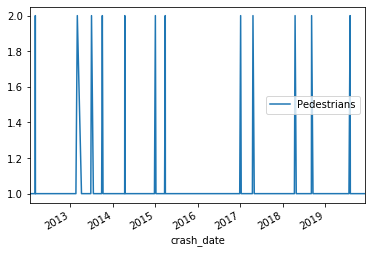

In [0]:
act_data.plot(y="Pedestrians", x="crash_date")

What is going on with the dates?  We haven't specified an order, and we didn't create a date index.

Let's sort before plotting:

(**Alternatively** we could set a date index - then we wouldn't need to sort this here!)

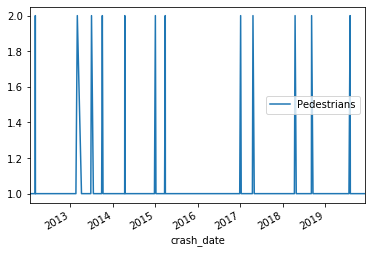

In [0]:
act_data.sort_values(['crash_date']).plot(y="Pedestrians", x="crash_date")

What about those peaks?

Notice the axis marks on the y-axis?

The number of pedestrians in any accident is either 1, or 2.

This doesn't give us a picture of what is happening over time.

---
## Grouping
You can control your plots, and statistical calculations, through grouping.

Grouping "bunches together" things which are "alike".

If we group_by year, and sum the group, then we get a different perspective 


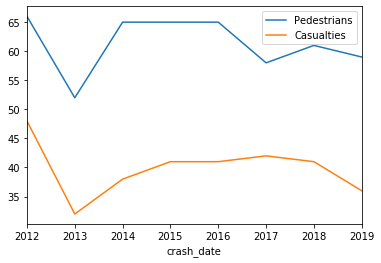

In [0]:
act_data.groupby(act_data.crash_date.dt.year).sum().plot()

### Date functions to group by

1. weekday (the day of week on which the crash occurred)
2. month  (the month of the year on which the crash occurred)
3. year (the year in which the crash occurred)



Text(0.5, 0, 'Year')

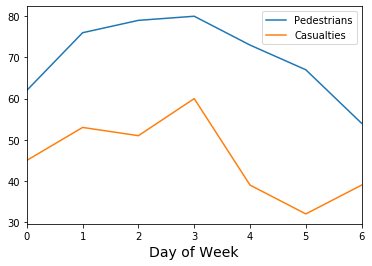

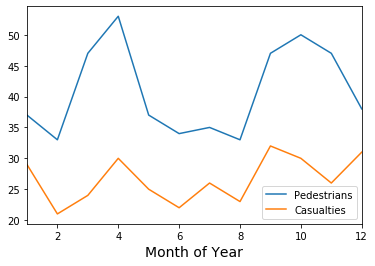

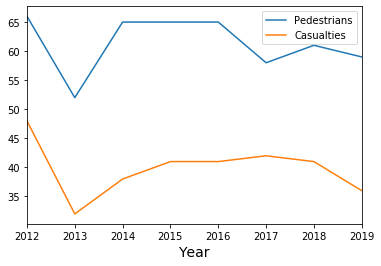

In [0]:
act_data.groupby(act_data.crash_date.dt.weekday).sum().plot()
plt.xlabel('Day of Week', fontsize=14)
act_data.groupby(act_data.crash_date.dt.month).sum().plot()
plt.xlabel('Month of Year', fontsize=14)
act_data.groupby(act_data.crash_date.dt.year).sum().plot()
plt.xlabel('Year', fontsize=14)


In [0]:
# NOTE: we can use the additional columns we created
act_data.groupby(act_data.crash_year).sum().plot()
plt.xlabel('Year', fontsize=14)

---
# Filtering

We can select which rows, or columns, of data we are interested in looking at.

This can help us answer questions about the data.

For example - we may be interested in investigating the severity of the crash.

The function "unique()" lets us find the values ono which we might filter.



In [0]:
# Using column name directly
act_data.Severity.unique()
# Using array syntax for accessing column name - necessary if column names contain spaces.
act_data['Severity'].unique()

array(['Injury', 'Property Damage Only', 'Fatal'], dtype=object)

There are 3 values
1. Injury
2. Property Damage Only
3. Fatal

Let's find the Injuries.

We need to set Severity as an index to use it as a filter.

And then we can use 3 ways of selecting which rows (or columns)

1. items -- exact match on column name
2. like -- a match on part of a string
3. regex -- using a regular expression to match the row contents

We will use "like"

In [0]:
# we create a new dataframe called injuries
injuries = act_data.set_index('Severity').filter(like="Injury", axis=0)
injuries

,crash_date,Crash_Time,Crash_Type,Pedestrians,Casualties,Location,Location
Severity,,,,,,,
Injury,2017-01-23,16:00,Struck pedestrian (On Road),1,1,RATCLIFFE CRESCENT (CHALLINOR -> CHALLINOR),"(-35.23191, 149.054575)"
Injury,2016-05-09,10:29,Struck pedestrian (Off Road),1,1,BORROWDALE STREET (NORFOLK -> BORROWDALE),"(-35.342443, 149.12875)"
Injury,2012-09-25,10:16,Struck pedestrian (On Road),1,1,BRISBANE AVENUE (JOHN MCEWEN -> STATE),"(-35.308829, 149.130814)"
Injury,2014-06-08,17:30,Struck pedestrian (On Road),1,1,EBDEN/WAKEFIELD INTERSECTION,"(-35.262425, 149.147201)"
Injury,2019-10-08,20:30,Struck pedestrian (On Road),1,1,TUGGERANONG PARKWAY (LADYWTUGGSRM -> TUGGSCOTT...,"(-35.304403, 149.063315)"
...,...,...,...,...,...,...,...
Injury,2018-10-15,13:02,Struck pedestrian (On Road),1,1,MOUAT STREET (ANTILL / NORTHBOURNE -> GOODWIN),"(-35.248157, 149.133119)"
Injury,2012-05-03,16:35,Struck pedestrian (On Road),1,1,MIRRABEI DRIVE (ANTHONY ROLFE / GUNDAROO -> PA...,"(-35.181466, 149.128234)"
Injury,2018-09-17,18:10,Struck pedestrian (On Road),1,0,BENJAMIN WAY (JOYNTON SMITH / BELCONNEN BUSWAY...,"(-35.240502, 149.067479)"


Now we can describe injuries, and plot injuries

In [0]:
injuries.describe()

,Pedestrians,Casualties
count,306.000000,306.000000
mean,1.022876,1.003268
std,0.149752,0.189881
min,1.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,2.000000,2.000000


Text(0.5, 0, 'Year')

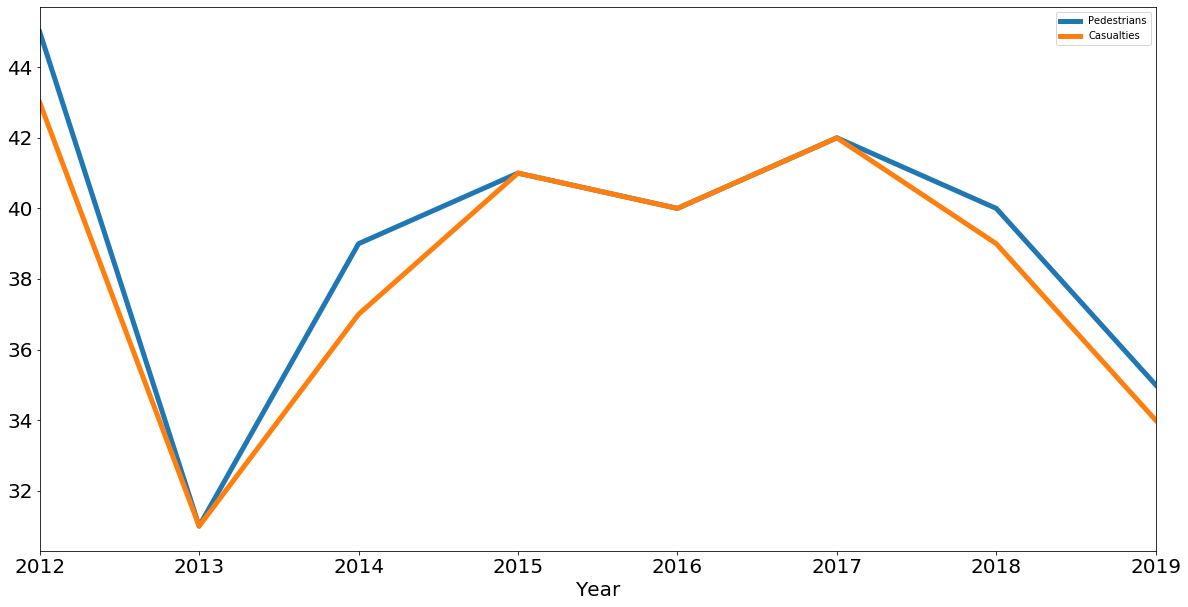

In [0]:
injuries.groupby(injuries.crash_date.dt.year).sum().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)


---
# Querying
A query is a more powerful type of filter.

The required code is:
```python
query_result = dataframe.query("querystring")
```
This runs a query represented by the querystring against the dataframe.

A query string contains a boolean expression listing columns in the dataframe,
operators, and values (or other columns).

Rows in the dataframe for which the querystring evaluates to True are added to the query_result.

Operators:
```python
  == (is equal to)
  > (greater than)
  >= (greater than or equal to)
  < (less than)
  <= (less than or equal to)
  != (not equal to)
  multiple expressions can be combined using and, or and not
  and (A and B) - both expression A and B must return True
  or (A or B) - either A or B must return True. Both cannot be False
  not A - expression A must return False
```



In [0]:
# It is important to know the data types of your columns
# crash_year in this example is a string
# So it must be compared as a string

# This query asks for rows where severity is "Fatal" and crash_year is "2014"
fatal_2014 = act_data.query('Severity == "Fatal"')
fatal_2014.head()
fatal_2014.sum(axis=0)

Pedestrians    12
Casualties     12
dtype: int64

---
# Questions
1. On which day of the week have most the most fatalities occured?
2. How many fataities have there been in total?
3. Which is the worst month for injuries?
4. How do the trends in injuries and property damage match?

Use your skills with grouping and filtering, and sum - to answer these questions.

---
# Advanced Topic

## Advanced Plotting

Pandas enables sophisticated calculation.
For example - we can calculate a rolling mean.

NOTE: Rolling means require "standardised data" - like a daily (stanndard period) measurement.  

The rolling mean in this case does not help us understand the dataset.  Also - Pandas has chosen (by default) to plot by severity.  Which is "Injury" for all items in this dataset. 

In [0]:
peds = injuries[['Pedestrians']]
peds.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Severity', fontsize=20)

We need to set a date index for our next operations.
"inplace=True" means that it happens to the dataframe directly.

In [0]:
injuries.set_index('crash_date', inplace=True)
injuries.index


# Scatterplots

By defining a marker, and making the linestyle "None", we can create a scatterplot of our data using pandas.

We can also control the axis labels, and subplots.


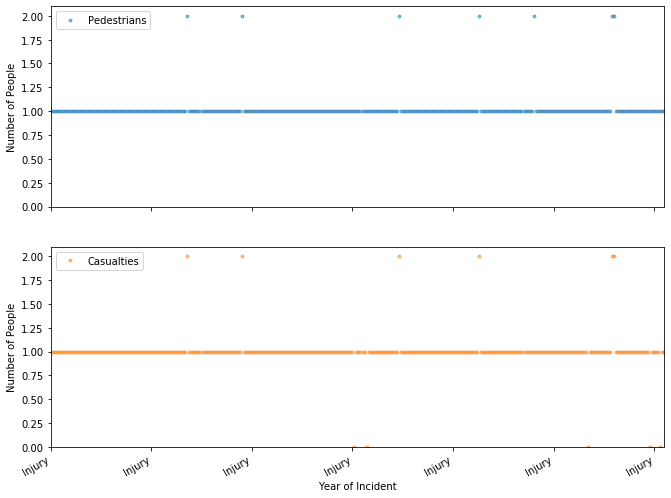

In [0]:
# Create a list of the columns we are interested in plotting
data_columns = ['Pedestrians','Casualties']

# define axes for a scatterplot (marker is a period)
#   and plot!
axes = injuries[data_columns].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
# for each plot (one for Pedestrians and on for Casualties)
for ax in axes:
    # set a y axis label
    ax.set_ylabel('Number of People')
    # set our bounds for the y-axis
    ax.set_ybound(lower=0, upper=2.1)
    # set an x-axis label
    ax.set_xlabel('Year of Incident')

# Summary plots

We can create a sum of data for each month (or any time period - week, year, etc.). This enables us to see patterns over time, comparing the number of incidents for each onth, and changes to the rate of pedestrian accident over time.

We will also see how to manage the plot size, plot multiple graphs on a single set of axes, and add legends.

In [0]:
# Plot a monthly sum for pedestrians and casualties on a single plot
injury_monthly = injuries[data_columns].resample('M').sum()

# We need to use the matplotlib dates module
import matplotlib.dates as mdates

# we can set our plot area using figsize
# defining fig, ax from matplotlib subplots allows us to plot multiple data on the same axis
fig, ax = plt.subplots(figsize=(30,10))

# plot pedestrians as a black line
ax.plot(injury_monthly['Pedestrians'], color='black', label='Pedestrians')
# plot casualties as an area
injury_monthly[['Casualties']].plot.area(ax=ax, linewidth=0)
# we will use a Month Locator for x axis labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Alternatively use a Year Locator for x axis labels (1 per year)
# ax.xaxis.set_major_locator(mdates.YearLocator())

# Add a legend
ax.legend()
# Set a y-label
ax.set_ylabel('Monthly Total (People)');
ax.set_xlabel('Month of Year');

TypeError: ignored

## Seaborn

Seaborn is an advanced [statistical data visualisation](https://seaborn.pydata.org/) library.

We will start looking at some of its capabilities.

In [0]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

# Box Plots

We can use seaborn to create a boxplot.

In this case - we will use the injury data summed by month (as created above)

This will summarise the data for ALL years, by month

In [0]:
# Seaborn is used to create a box plot
fig, axes = plt.subplots(2, 1, figsize=(30, 10), sharex=True)
for name, ax in zip(['Pedestrians', 'Casualties'], axes):
  sns.boxplot(data=injury_monthly, x=injury_monthly.index.month, y=name, ax=ax)
  ax.set_ylabel('Persons')
  ax.set_xticklabels(injury_monthly.index.strftime("%B"))
  ax.set_title(name)
  ax.set_xlabel('')
axes[1].set_xlabel('Month of Year')
